<a href="https://colab.research.google.com/github/unnimaya-vu/CognoRise/blob/main/car_priceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [ ]:
df.shape

(205, 26)

In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.drop(["car_ID"],axis=1,inplace=True)

In [ ]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

<Axes: xlabel='enginesize'>

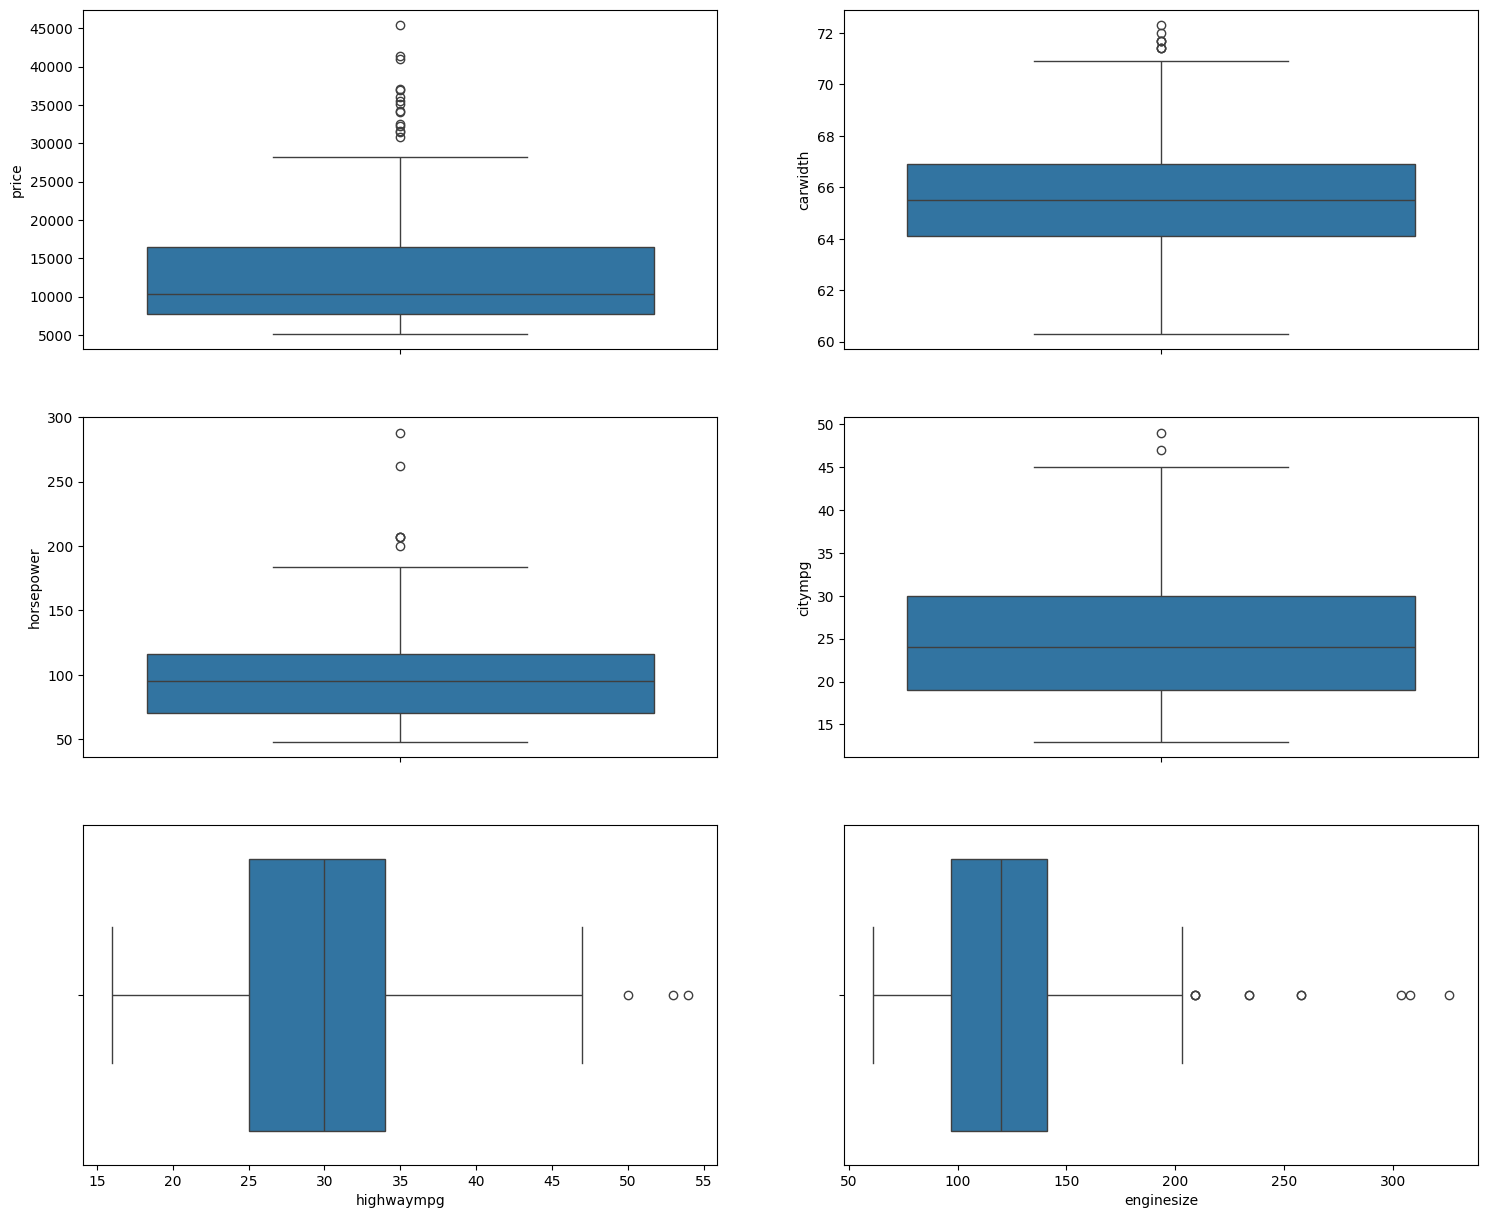

In [ ]:
fig,ax=plt.subplots(3,2,figsize=(18,15))
sns.boxplot(y=df['price'],ax=ax[0][0])
sns.boxplot(y=df['carwidth'],ax=ax[0][1])
sns.boxplot(y=df['horsepower'],ax=ax[1][0])
sns.boxplot(y=df['citympg'],ax=ax[1][1])
sns.boxplot(x=df['highwaympg'],ax=ax[2][0])
sns.boxplot(x=df['enginesize'],ax=ax[2][1])


<Axes: xlabel='wheelbase'>

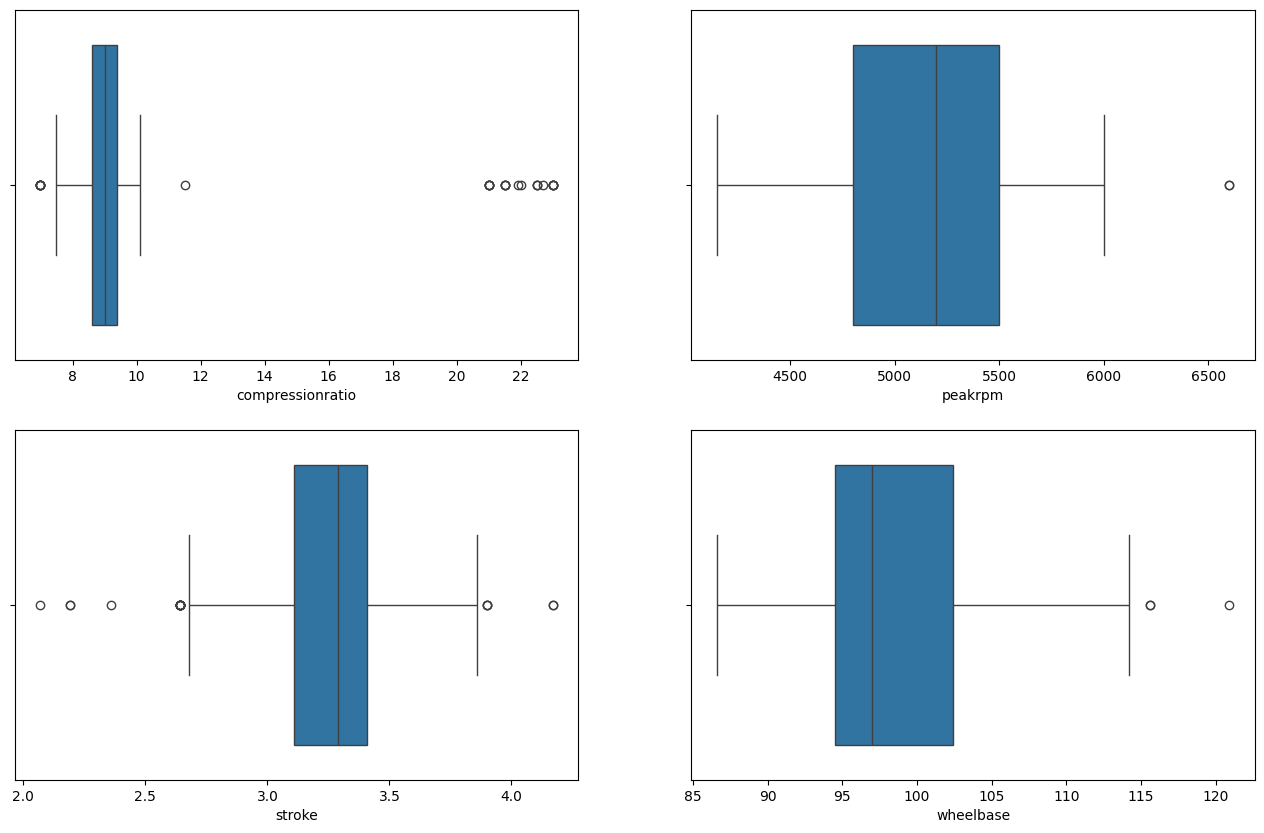

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(16,10))
sns.boxplot(x=df['compressionratio'],ax=ax[0][0])
sns.boxplot(x=df['peakrpm'],ax=ax[0][1])
sns.boxplot(x=df['stroke'],ax=ax[1][0])
sns.boxplot(x=df['wheelbase'],ax=ax[1][1])

Removing Outliers

In [ ]:
from scipy import stats
df =df[(np.abs(stats.zscore(df['price']))<3)]
df =df[(np.abs(stats.zscore(df['carwidth']))<3)]
df =df[(np.abs(stats.zscore(df['horsepower']))<3)]
df =df[(np.abs(stats.zscore(df['citympg']))<3)]
df =df[(np.abs(stats.zscore(df['highwaympg']))<3)]
df =df[(np.abs(stats.zscore(df['enginesize']))<3)]
df =df[(np.abs(stats.zscore(df['stroke']))<3)]
df =df[(np.abs(stats.zscore(df['compressionratio']))<3)]

<Axes: >

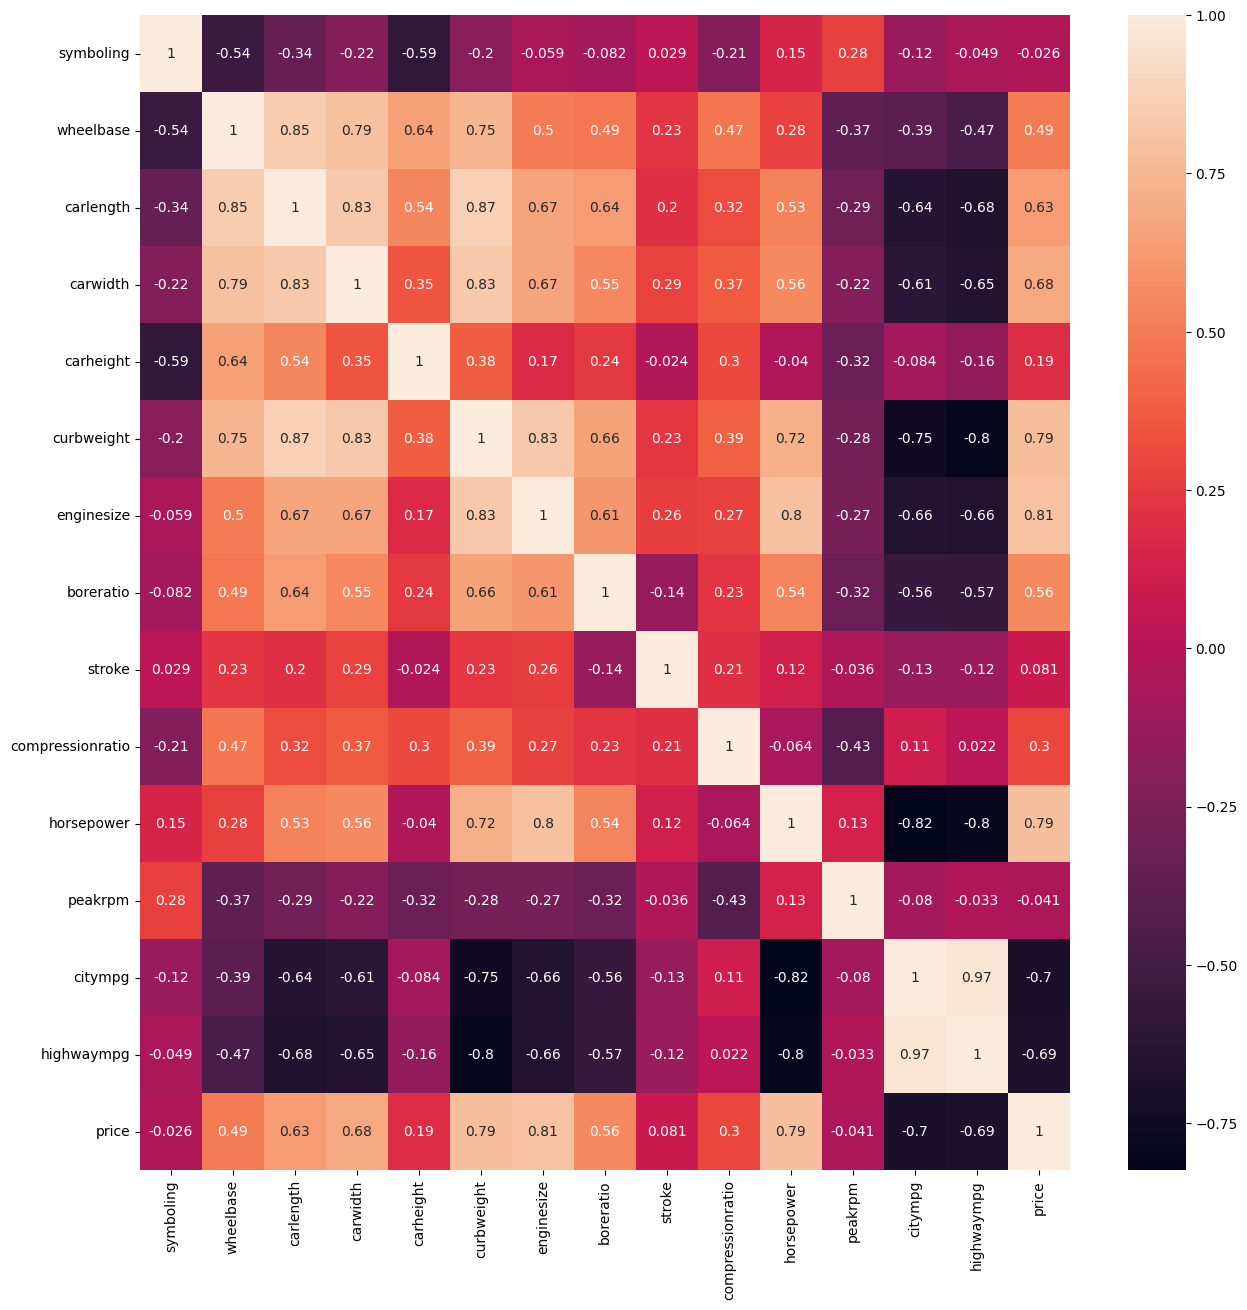

In [ ]:
plt.figure(figsize=(15,15))
corr = df.corr()
sns.heatmap(corr, annot = True)

In [ ]:
df.drop(['symboling','peakrpm','stroke'],axis=1,inplace=True)

<Axes: xlabel='enginetype', ylabel='count'>

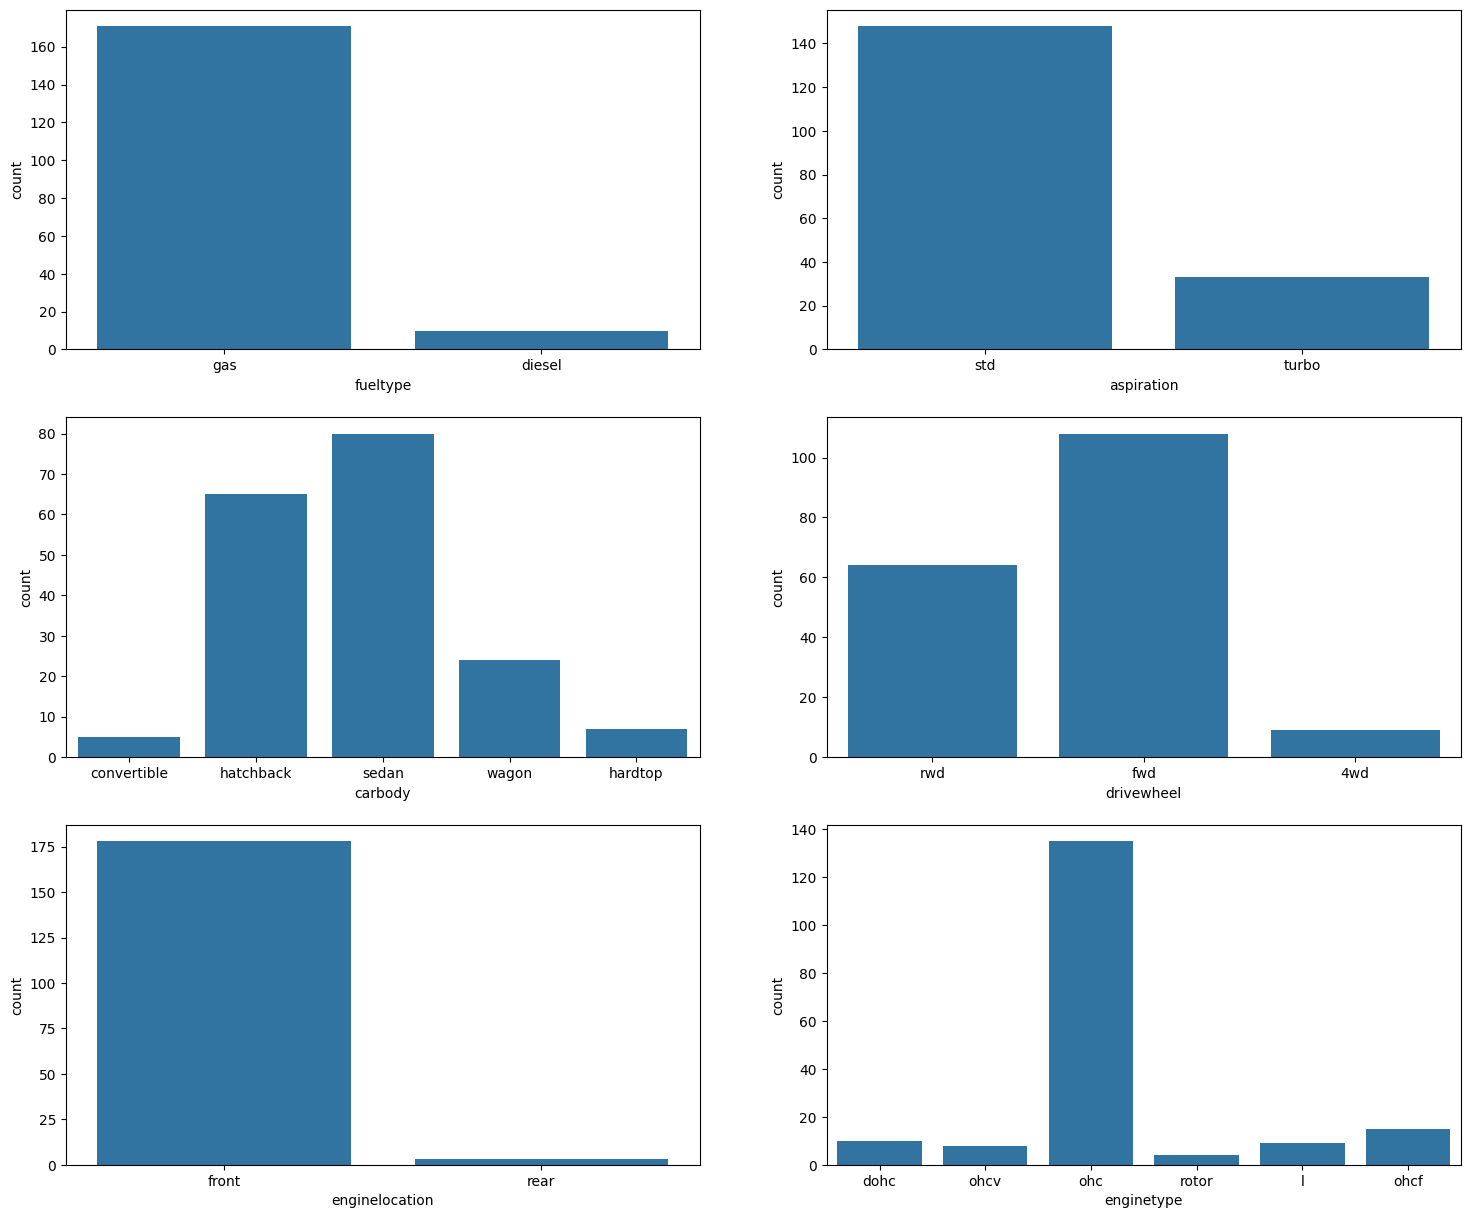

In [ ]:
fig,ax=plt.subplots(3,2,figsize=(18,15))
sns.countplot(x=df['fueltype'],ax=ax[0][0])
sns.countplot(x=df['aspiration'],ax=ax[0][1])
sns.countplot(x=df['carbody'],ax=ax[1][0])
sns.countplot(x=df['drivewheel'],ax=ax[1][1])
sns.countplot(x=df['enginelocation'],ax=ax[2][0])
sns.countplot(x=df['enginetype'],ax=ax[2][1])

<Axes: xlabel='cylindernumber', ylabel='count'>

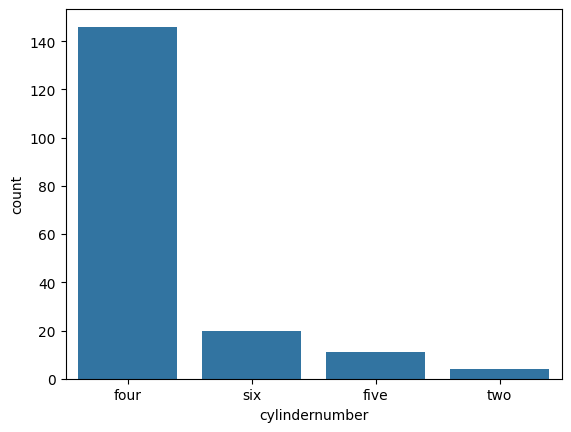

In [ ]:
sns.countplot(x ='cylindernumber', data = df)

<Axes: xlabel='fuelsystem', ylabel='count'>

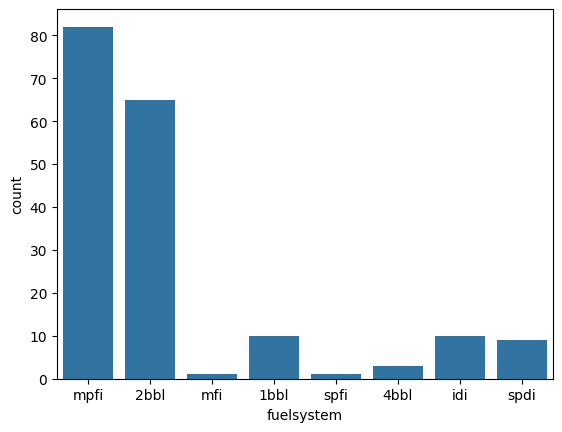

In [ ]:
sns.countplot(x ='fuelsystem', data = df)

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['CarName']=lab.fit_transform(df['CarName'])
df['fueltype']=lab.fit_transform(df['fueltype'])
df['aspiration']=lab.fit_transform(df['aspiration'])
df['doornumber']=lab.fit_transform(df['doornumber'])
df['carbody']=lab.fit_transform(df['carbody'])
df['drivewheel']=lab.fit_transform(df['drivewheel'])
df['enginelocation']=lab.fit_transform(df['enginelocation'])
df['enginetype']=lab.fit_transform(df['enginetype'])
df['cylindernumber']=lab.fit_transform(df['cylindernumber'])
df['fuelsystem']=lab.fit_transform(df['fuelsystem'])
df


,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,compressionratio,horsepower,citympg,highwaympg,price
0,2,1,0,1,0,2,0,88.6,168.8,64.1,...,0,1,130,5,3.47,9.0,111,21,27,13495.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,0,1,130,5,3.47,9.0,111,21,27,16500.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,4,2,152,5,2.68,9.0,154,19,26,16500.0
3,4,1,0,0,3,1,0,99.8,176.6,66.2,...,2,1,109,5,3.19,10.0,102,24,30,13950.0
4,5,1,0,0,3,0,0,99.4,176.6,66.4,...,2,0,136,5,3.19,8.0,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,128,1,1,0,4,2,0,104.3,188.8,67.2,...,2,1,130,5,3.62,7.5,162,17,22,18950.0
177,124,1,0,0,3,2,0,109.1,188.8,68.9,...,2,1,141,5,3.78,9.5,114,23,28,16845.0
178,123,1,1,0,3,2,0,109.1,188.8,68.8,...,2,1,141,5,3.78,8.7,160,19,25,19045.0
179,125,1,0,0,3,2,0,109.1,188.8,68.9,...,4,2,173,5,3.58,8.8,134,18,23,21485.0


In [ ]:
df.reset_index(drop=True,inplace=True)
df

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,compressionratio,horsepower,citympg,highwaympg,price
0,2,1,0,1,0,2,0,88.6,168.8,64.1,...,0,1,130,5,3.47,9.0,111,21,27,13495.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,0,1,130,5,3.47,9.0,111,21,27,16500.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,4,2,152,5,2.68,9.0,154,19,26,16500.0
3,4,1,0,0,3,1,0,99.8,176.6,66.2,...,2,1,109,5,3.19,10.0,102,24,30,13950.0
4,5,1,0,0,3,0,0,99.4,176.6,66.4,...,2,0,136,5,3.19,8.0,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,128,1,1,0,4,2,0,104.3,188.8,67.2,...,2,1,130,5,3.62,7.5,162,17,22,18950.0
177,124,1,0,0,3,2,0,109.1,188.8,68.9,...,2,1,141,5,3.78,9.5,114,23,28,16845.0
178,123,1,1,0,3,2,0,109.1,188.8,68.8,...,2,1,141,5,3.78,8.7,160,19,25,19045.0
179,125,1,0,0,3,2,0,109.1,188.8,68.9,...,4,2,173,5,3.58,8.8,134,18,23,21485.0


In [ ]:
df.dtypes

CarName               int64
fueltype              int64
aspiration            int64
doornumber            int64
carbody               int64
drivewheel            int64
enginelocation        int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int64
cylindernumber        int64
enginesize            int64
fuelsystem            int64
boreratio           float64
compressionratio    float64
horsepower            int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [ ]:
df.shape

(181, 22)

In [ ]:
x = df.drop('price', axis=1)
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=42)

Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([ 5967.79,  6321.87, 12871.45,  9411.49,  8205.52, 29107.14,
        6566.54,  8184.25, 32908.26, 15173.8 , 17570.2 , 16559.01,
        9556.25,  7363.53,  5909.78, 29288.95, 11935.61,  7933.7 ,
       17252.56,  9247.28, 15915.28, 17074.48,  7673.12,  6671.54,
       17308.45, 17045.77, 28783.71,  6316.84,  9561.2 , 17160.6 ,
        9362.38,  8970.3 ,  7872.47,  8199.49,  6178.07,  6178.05,
       13824.81,  5823.31,  6335.44,  6673.7 , 18722.71,  6278.71,
        7266.58, 15964.53, 16700.66, 10282.92, 15180.98, 11222.01,
       14812.62, 11535.54, 17050.64, 10757.68, 16425.82, 18404.69,
        5891.78])

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
print('Mean squared Error is',mean_squared_error(y_test,y_pred))
print("Percentage error is",mean_absolute_percentage_error(y_test,y_pred))
r2_random=r2_score(y_test,y_pred)
print("R2_score is ",r2_random)

Mean Absolute Error is 1415.9590363636364
Mean squared Error is 3978876.141214345
Percentage error is 0.12119648776817582
R2_score is  0.9166965754169117


<Axes: xlabel='price'>

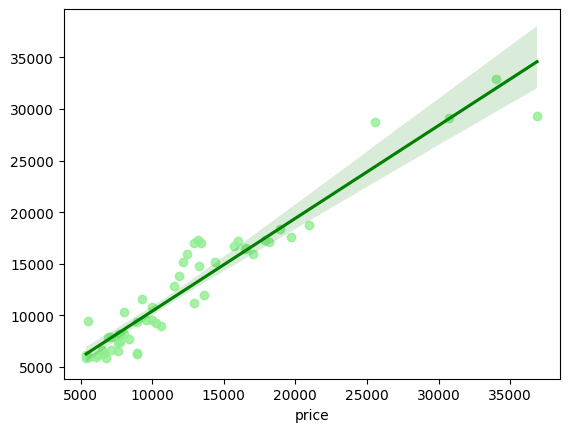

In [ ]:
sns.regplot(x=y_test,y=y_pred,color='lightgreen',line_kws={"color": "g"})